In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from twoDsampler import twoDsamplefromGaussian as tDsfG

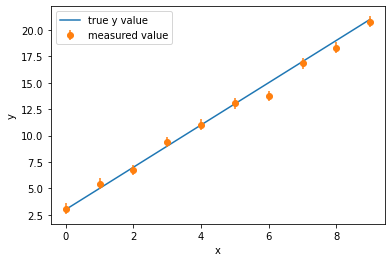

In [7]:
#making my probability function:

#set parameters, arrays
a=2
b=3
sig_y=0.5
data_len=10
y_i=np.zeros(data_len)
x_i=np.zeros(data_len)

def y_hat(x_i):
    return(a*x_i+b)

pi=np.pi
e=np.e

#create my x array, going to choose even spacing
x_i=np.arange(0,data_len)

from numpy import random
for i in range(len(x_i)):
    mean=a*x_i[i]+b
    sigma=sig_y

    s = np.random.normal(mean, sigma, 1)
    y_i[i]=s
    
#print(y_i)

plt.plot(x_i,y_hat(x_i), label="true y value")
plt.errorbar(x_i,y_i, yerr=sig_y, fmt='o', label="measured value")
plt.legend()
plt.ylabel("y")
plt.xlabel("x")

a_guess=np.linspace(a*0.8,a*1.2,500)
b_guess=np.linspace(b*0.8,b*1.2,400)

aa,bb=np.meshgrid(a_guess,b_guess)
chi2vals = np.zeros(np.prod(aa.shape))


def prob(point):
    point[0]=a_val
    point[1]=b_val
    val=np.exp(-0.5*np.sum(((y_i-(a_val*x_i+b_val))/(sig_y))**2 ))
    return val

# # for i in range(len(a_guess)-1):
# #     for j in range(len(b_guess)-1):
# #         chi2valstest[i][j]=chi2(a_guess[i],b_guess[j],x_i,y_i,sig_y)

# for i,(ai,bi) in enumerate(zip(aa.flatten(),bb.flatten())):
#     chi2vals[i]=chi2(ai,bi,x_i,y_i,sig_y)
    


In [8]:
#need to sample through a,b space with 2D sampler
#the sampler moves along the gradient of the probability function
maxstepa=0.05
maxstepb=0.2
initialpoint=[0,0]
numsteps=100000
samples=tDsfG(prob, maxstepa, maxstepb, initialpoint, numsteps)
plt.scatter(aa,bb,samples)

TypeError: twoDsamplefromGaussian() takes 4 positional arguments but 5 were given